In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

from collections import OrderedDict

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np

path = '../curriculum/project-03/feature-engineering-classification/instacart_data_subset/'
df_orders = pd.read_csv(path + 'orders_subset.csv')
df_orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0


In [4]:
df_order_products_prior = pd.read_csv(path + 'order_products__prior_subset.csv')
df_order_products_prior.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,12,30597,1,1
1,12,15221,2,1
2,12,43772,3,1


In [5]:
df_order_products_train = pd.read_csv(path + 'order_products__train_subset.csv')
df_order_products_train.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1077,13176,1,1
1,1077,39922,2,1
2,1077,5258,3,1


In [6]:
df_order_products_train = df_order_products_train.merge(df_orders.drop('eval_set', axis=1), on='order_id')
df_order_products_prior = df_order_products_prior.merge(df_orders.drop('eval_set', axis=1), on='order_id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53704 entries, 0 to 53703
Data columns (total 9 columns):
order_id                  53704 non-null int64
product_id                53704 non-null int64
add_to_cart_order         53704 non-null int64
reordered                 53704 non-null int64
user_id                   53704 non-null int64
order_number              53704 non-null int64
order_dow                 53704 non-null int64
order_hour_of_day         53704 non-null int64
days_since_prior_order    53704 non-null float64
dtypes: float64(1), int64(8)
memory usage: 4.1 MB


In [24]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1077,13176,1,1,173934,11,6,9,10.0
1,1077,39922,2,1,173934,11,6,9,10.0
2,1077,5258,3,1,173934,11,6,9,10.0
3,1077,21137,4,1,173934,11,6,9,10.0
4,1119,6046,1,1,129386,7,1,14,17.0


In [7]:
df_user_product = (df_order_products_prior.groupby(['product_id','user_id'],as_index=False) 
                                          .agg({'order_id':'count'}) 
                                          .rename(columns={'order_id':'user_product_total_orders'}))

train_ids = df_order_products_train['user_id'].unique() 
df_X = df_user_product[df_user_product['user_id'].isin(train_ids)]
df_X.head()

,product_id,user_id,user_product_total_orders
0,1,21285,1
1,1,47549,4
2,1,54136,1
3,1,54240,1
4,1,95730,1


In [11]:
train_carts = (df_order_products_train.groupby('user_id',as_index=False)
                                      .agg({'product_id':(lambda x: set(x))})
                                      .rename(columns={'product_id':'latest_cart'}))

df_X = df_X.merge(train_carts, on='user_id')
df_X['in_cart'] = (df_X.apply(lambda row: row['product_id'] in row['latest_cart'], axis=1).astype(int))

df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart_x,in_cart,latest_cart_y,latest_cart
0,1,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}","{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
1,3298,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}","{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
2,4920,21285,3,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}","{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
3,6066,21285,2,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}","{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
4,6184,21285,6,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}","{21573, 35561, 37710, 11759, 12341, 13176, 32478}"


In [13]:
df_X = df_X.drop(['latest_cart_x', 'latest_cart_y'], axis=1)

In [14]:
df_X

,product_id,user_id,user_product_total_orders,in_cart,latest_cart
0,1,21285,1,0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
1,3298,21285,1,0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
2,4920,21285,3,0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
3,6066,21285,2,0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
4,6184,21285,6,0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
5,7987,21285,2,0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
6,10509,21285,5,0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
7,11759,21285,30,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
8,12341,21285,35,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"
9,13042,21285,1,0,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}"


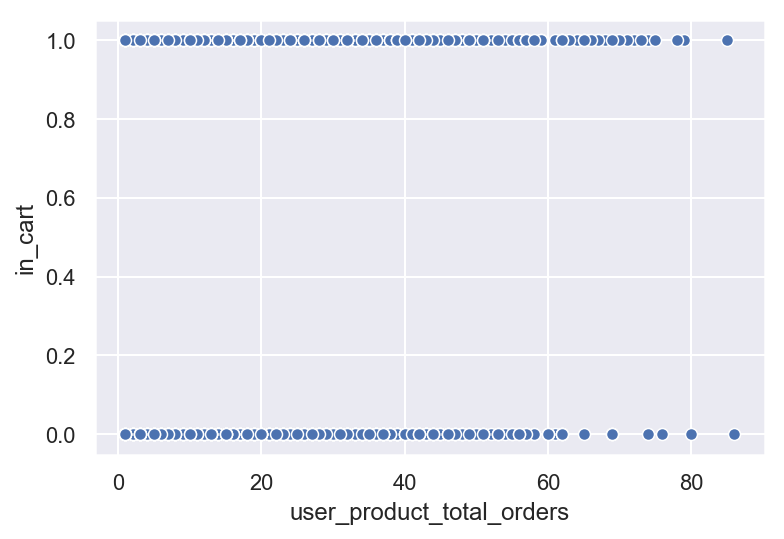

In [22]:
sns.scatterplot(df_X['user_product_total_orders'], df_X['in_cart'])

In [25]:
user_prod_features = ['user_product_avg_add_to_cart_order']

df_user_prod_features = (df_order_products_prior.groupby(['product_id','user_id'],as_index=False) \
                                                .agg(OrderedDict(
                                                     [('add_to_cart_order','mean')])))

df_user_prod_features.columns = ['product_id','user_id'] + user_prod_features 
df_user_prod_features.head()

,product_id,user_id,user_product_avg_add_to_cart_order
0,1,21285,3.0
1,1,47549,4.0
2,1,54136,3.0
3,1,54240,2.0
4,1,95730,1.0


In [ ]:
df_user_prod_features.head()